# **Database Monkey usinhg K-Mean**


## ======================🇬🇧======================

The K-Means itself is not an algorithm that generates figures. What happens is that, after applying the K-Means algorithm to group the data (as done in the cell that applies K-Means and then plots), we can visualize the results of the clustering using plotting libraries like Matplotlib and Seaborn. The figure you see is a scatter plot of your data, where each point is colored according to the cluster it was assigned to by K-Means. This helps us visually understand how the algorithm separated the data.

As for why K-Means is not always the most recommended algorithm, there are a few main reasons:

Sensitivity to initial centroids: The result of K-Means can vary depending on where the initial centroids are placed. If the initial centroids are not well chosen, the algorithm can converge to a local minimum instead of the global minimum, resulting in suboptimal clusters.
Assumes spherical and similarly sized clusters: K-Means tends to form clusters that are more or less spherical and of similar size. It does not work well with irregularly shaped clusters, such as crescent-shaped clusters, or with clusters of very different sizes.
Sensitivity to outliers: Outliers (extreme data points) can significantly affect the position of the centroids and distort the clustering results.
Requires the number of clusters (k) to be specified: You need to define the number of clusters (k) in advance. It is not always easy to know the optimal number of clusters in a dataset.
Despite these limitations, K-Means is popular due to its simplicity and computational efficiency, especially for large datasets. It is a good option when clusters are expected to be more or less spherical and the number of clusters is known or can be reasonably estimated.

In summary, the figure is a visual representation of the clusters found by K-Means, not something that K-Means directly generates. The algorithm's limitations come from how it calculates distances and means to form the clusters.

#

## ======================🇧🇷======================

O K-Means em si não é um algoritmo que gera figuras. O que acontece é que, após aplicar o algoritmo K-Means para agrupar os dados (como feito na célula que aplica o K-Means e depois plota), podemos visualizar os resultados do agrupamento usando bibliotecas de plotagem como Matplotlib e Seaborn. A figura que você vê é um scatter plot dos seus dados, onde cada ponto é colorido de acordo com o cluster ao qual foi atribuído pelo K-Means. Isso nos ajuda a entender visualmente como o algoritmo separou os dados.

Quanto ao porquê de o K-Means não ser sempre o algoritmo mais recomendado, existem algumas razões principais:

Sensibilidade aos centroides iniciais: O resultado do K-Means pode variar dependendo de onde os centroides iniciais são colocados. Se os centroides iniciais não forem bem escolhidos, o algoritmo pode convergir para um mínimo local em vez do mínimo global, resultando em agrupamentos subótimos.
Assume clusters esféricos e de tamanho semelhante: O K-Means tende a formar clusters que são mais ou menos esféricos e de tamanho similar. Ele não funciona bem com clusters de formas irregulares, como aglomerados em forma de meia-lua, ou com clusters de tamanhos muito diferentes.
Sensibilidade a outliers: Outliers (pontos de dados extremos) podem afetar significativamente a posição dos centroides e distorcer os resultados do agrupamento.
Requer que o número de clusters (k) seja especificado: Você precisa definir o número de clusters (k) antecipadamente. Nem sempre é fácil saber o número ideal de clusters em um conjunto de dados.
Apesar dessas limitações, o K-Means é popular devido à sua simplicidade e eficiência computacional, especialmente para grandes conjuntos de dados. É uma boa opção quando os clusters são esperados para serem mais ou menos esféricos e o número de clusters é conhecido ou pode ser razoavelmente estimado.

Resumindo, a figura é uma representação visual dos clusters encontrados pelo K-Means, e não algo que o K-Means gera diretamente. As limitações do algoritmo vêm da forma como ele calcula distâncias e médias para formar os clusters.

In [20]:
import pandas as pd
monkey = pd.read_csv('/content/monkey.csv')
monkey

,d1,d2
0,8.809783,7.611147
1,4.110747,11.103186
2,4.114710,11.039587
3,3.154736,6.743244
4,5.972931,7.537982
...,...,...
3995,-1.601140,14.773205
3996,-1.578630,14.893001
3997,-1.558350,15.013389
3998,-1.540340,15.134325


## Summary:

### Data Analysis Key Findings

*   The original dataset contains two numerical columns, 'd1' and 'd2'.
*   Visualizing the original data reveals a non-linearly separable spiral pattern.
*   The data was successfully normalized using `MinMaxScaler`, scaling the 'd1' and 'd2' columns to a range between 0 and 1.
*   The K-Means algorithm was applied to the normalized data with `n_clusters=5`, assigning each data point to one of five clusters.
*   Visualizing the normalized data with cluster assignments shows that K-Means with five clusters still struggles to effectively separate the spiral shape, as expected for this type of data structure, which K-Means is not well-suited for.

### Insights or Next Steps

*   K-Means is not suitable for identifying the clusters in this dataset due to its assumption of convex-shaped clusters. Consider using density-based clustering algorithms like DBSCAN or algorithms specifically designed for non-linear structures.
*   Explore different values for the number of clusters or alternative clustering algorithms to better capture the underlying structure of the spiral data.

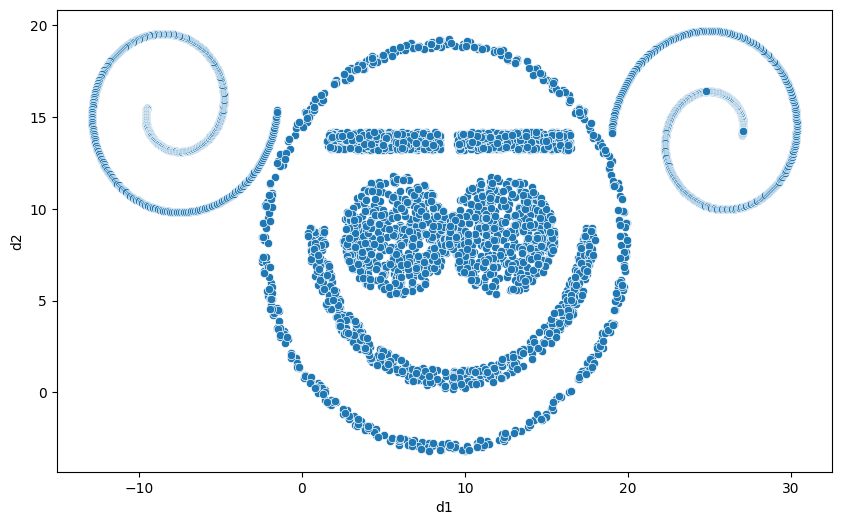

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(monkey, x = 'd1', y = 'd2')
plt.show()

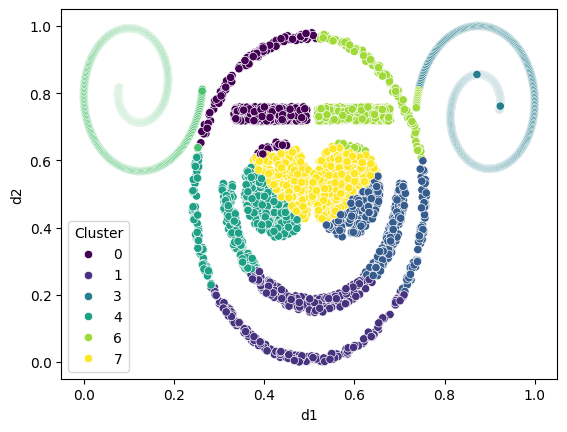

In [22]:
normalizer = MinMaxScaler()
monkey_normalized = pd.DataFrame(normalizer.fit_transform(monkey), columns = ['d1', 'd2'])
monkey_normalized
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_fit = kmeans.fit(monkey_normalized)
monkey_normalized['Cluster'] = kmeans_fit.labels_

sns.scatterplot(monkey_normalized, x = 'd1', y = 'd2', hue = 'Cluster', palette='viridis')
plt.show()

In [23]:
globular = pd.read_csv("/content/globular.csv")
globular

,d1,d2
0,8.809783,7.611147
1,4.110747,11.103186
2,4.114710,11.039587
3,3.154736,6.743244
4,5.972931,7.537982
...,...,...
995,13.092329,9.110222
996,13.071551,9.641615
997,10.383887,6.139417
998,9.420275,8.473474


In [24]:
display(globular.info())
display(globular.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d1      1000 non-null   float64
 1   d2      1000 non-null   float64
dtypes: float64(2)
memory usage: 23.4 KB


None

,d1,d2
count,1000.000000,1000.000000
mean,9.117904,8.513439
std,3.789389,1.490124
min,2.530788,5.333330
25%,5.896833,7.339002
50%,8.999503,8.441031
75%,12.486681,9.602245
max,15.483963,11.782053


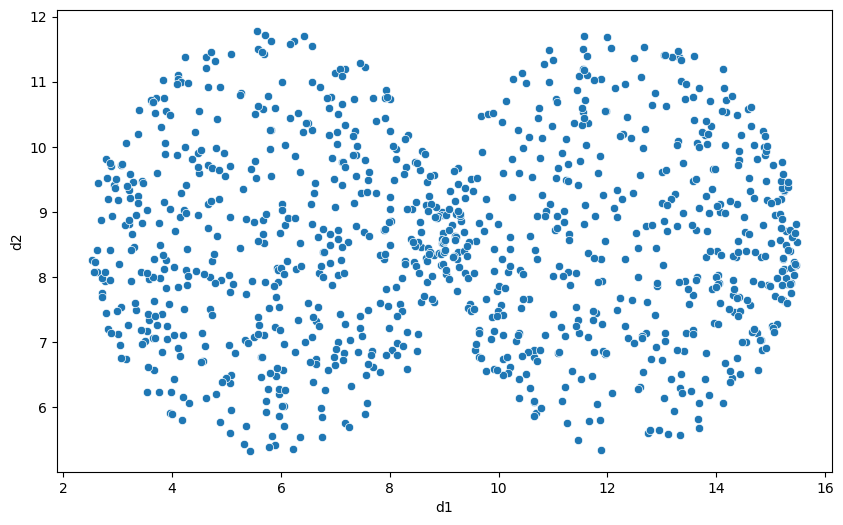

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(globular, x = 'd1', y = 'd2')
plt.show()

# Task
Analyze and visualize the '/content/espiral.csv' dataset using K-Means clustering, explaining the results in both Portuguese and English.

## Carregar os dados

### Subtask:
Carregar o dataset `/content/espiral.csv` em um DataFrame.


**Reasoning**:
The subtask is to load the `/content/espiral.csv` dataset into a pandas DataFrame and display the first few rows. This can be achieved by importing pandas, reading the CSV file, and then using the `head()` method.



In [27]:
import pandas as pd

espiral = pd.read_csv('/content/espiral.csv')
espiral.head()

,d1,d2
0,10.500000,9.000000
1,10.567170,9.268445
2,8.275320,11.382210
3,8.227458,11.377640
4,8.179511,11.372110


## Visualizar os dados originais

### Subtask:
Criar um scatter plot para ver a distribuição dos dados antes do agrupamento.


**Reasoning**:
Create a scatter plot to visualize the distribution of the data before applying K-Means clustering.



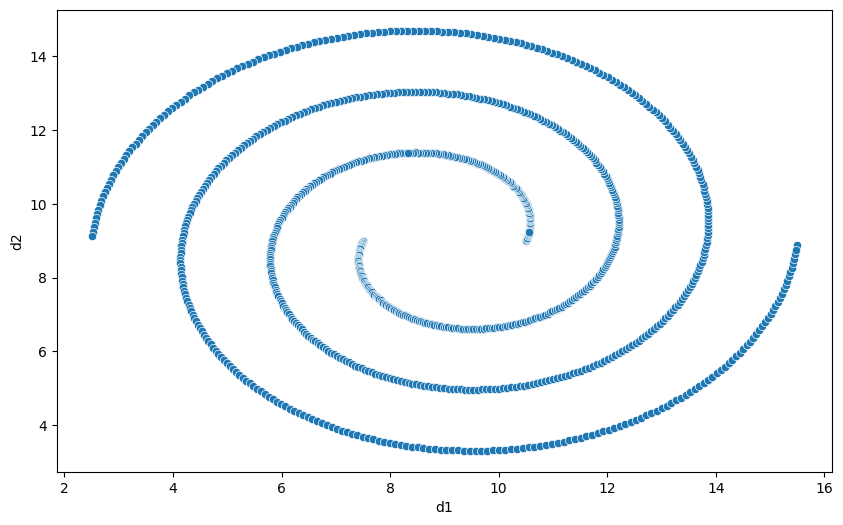

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=espiral, x='d1', y='d2')
plt.show()

## Normalizar os dados

### Subtask:
Aplicar a normalização aos dados para garantir que as diferentes escalas das features não afetem o K-Means.


**Reasoning**:
Apply MinMaxScaler to the espiral DataFrame to normalize the data.



In [29]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
espiral_normalized = pd.DataFrame(normalizer.fit_transform(espiral), columns = ['d1', 'd2'])
espiral_normalized

,d1,d2
0,0.615583,0.500000
1,0.620759,0.523585
2,0.444160,0.709292
3,0.440472,0.708890
4,0.436777,0.708404
...,...,...
995,0.993066,0.436147
996,0.994800,0.446671
997,0.996363,0.457248
998,0.997751,0.467873


## Aplicar k-means

### Subtask:
Executar o algoritmo K-Means nos dados normalizados para identificar os clusters.


**Reasoning**:
Import KMeans, instantiate the model, fit it to the normalized data, and add the cluster labels to the DataFrame.



In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_fit = kmeans.fit(espiral_normalized)
espiral_normalized['Cluster'] = kmeans_fit.labels_
espiral_normalized.head()

,d1,d2,Cluster
0,0.615583,0.500000,4
1,0.620759,0.523585,4
2,0.444160,0.709292,1
3,0.440472,0.708890,1
4,0.436777,0.708404,1


## Visualizar os clusters

### Subtask:
Criar um scatter plot dos dados normalizados, colorindo os pontos de acordo com os clusters encontrados pelo K-Means.


**Reasoning**:
Create a scatter plot of the normalized data, coloring points by their assigned cluster, to visualize the K-Means clustering result.



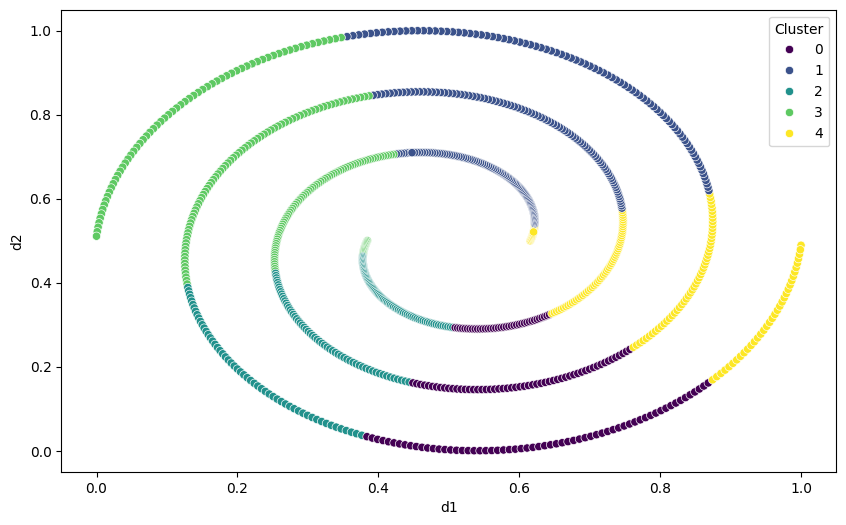

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=espiral_normalized, x='d1', y='d2', hue='Cluster', palette='viridis')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The original dataset contains two numerical columns, 'd1' and 'd2'.
*   Visualizing the original data reveals a non-linearly separable spiral pattern.
*   The data was successfully normalized using `MinMaxScaler`, scaling the 'd1' and 'd2' columns to a range between 0 and 1.
*   The K-Means algorithm was applied to the normalized data with `n_clusters=2`, assigning each data point to one of two clusters.
*   Visualizing the normalized data with cluster assignments shows that K-Means with two clusters could not effectively separate the spiral shape, as expected for this type of data structure.

### Insights or Next Steps

*   K-Means is not suitable for identifying the clusters in this dataset due to its assumption of convex-shaped clusters. Consider using density-based clustering algorithms like DBSCAN or algorithms specifically designed for non-linear structures.
*   Explore different values for the number of clusters or alternative clustering algorithms to better capture the underlying structure of the spiral data.
